# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Determinación-de-los-parámetros-de-los-retardadores" data-toc-modified-id="Determinación-de-los-parámetros-de-los-retardadores-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Determinación de los parámetros de los retardadores</a></div><div class="lev2 toc-item"><a href="#Parte-numérica" data-toc-modified-id="Parte-numérica-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Parte numérica</a></div><div class="lev1 toc-item"><a href="#Parte-experimental" data-toc-modified-id="Parte-experimental-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Parte experimental</a></div><div class="lev1 toc-item"><a href="#Comparación" data-toc-modified-id="Comparación-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Comparación</a></div><div class="lev1 toc-item"><a href="#Ajuste" data-toc-modified-id="Ajuste-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Ajuste</a></div><div class="lev2 toc-item"><a href="#Definición-de-funcion-de-ajuste" data-toc-modified-id="Definición-de-funcion-de-ajuste-41"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Definición de funcion de ajuste</a></div>

# Determinación de los parámetros de los retardadores

**Autor**: Luis Miguel Sanchez Brea

**Fecha**:   12/03/2018

**Objetivo**: Ecograb project, polariscope callibration

**Configuración**:

1. Diodo láser de Roithner .... de longitud de onda $\lambda$=850 nm (corriente = 314 mA).
1. Lente colimadora de Thorlabs DG10-600-B.
1. Difusor.
1. Lámina retardadora $\lambda/4$ ... de Throlabs para hacer el haz de luz circular.
1. Polarizador 1 Thorlabs LPNIRE100-B.
1. Retardador  2 $\lambda/4$ Thorlabs WPQ10E-850-SP
1. Polarizador 4 Thorlabs LPNIRE100-B.




**Procedimiento**:

Se conocen los parámetros y ángulos de P1 y P4.

1. Se interpone la lámina retardadora R2

1. Se deja P1 en un ángulo fijo.

1. Se hace un doble bucle for para R2 y P4.

**Teoría**

We rotate polarizer 4 in order to determine the polarization parameters of LPNIRE100-B. 

**Resultado**

1. Posición del ángulo de R2.
1. Parámetros de R2



In [40]:
from __future__ import print_function, division

# configuration
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [41]:
# import modules
from phyton_optics import sp, plt, mm, um, nm, degrees, np
import phyton_optics.polarization_stokes as polarization
from phyton_optics.polarization_stokes import (
    intensity, polarized_light, polarizer_linear, quarter_waveplate, rotate_mueller, 
    diattenuating_retarder, retarder, vacuum)

from polarimeter.polarimeter import (get_polarimeter_parameters, polarimeter_matrices,
    rotate_polarimeter, polarimeter_matrix, get_light_parameters)
from polarimeter.utils import dibujar_2d_fitting
from scipy import sin, cos,pi
from scipy.io import savemat, loadmat
from scipy import optimize

import pprint 
np.set_printoptions(precision=4)
sp.set_printoptions(precision=4)

## Parte experimental

In [3]:
#Cargo datos experimentales

filename='step4_R2b_parameters_2018-03-16.mat'
experimental_dict=loadmat(filename)

angles_1_e=experimental_dict['angle_1'].flatten()*degrees
angles_4_e=experimental_dict['angle_4'].flatten()*degrees

print(angles_1_e.min(), angles_1_e.max())

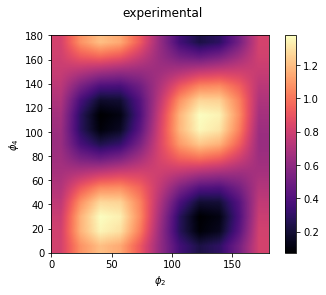

In [6]:
I_experimental=experimental_dict['intensities']
dibujar_2d_fitting(angles_1_e, angles_4_e, I_experimental, title='experimental')

## Parte numérica

In [7]:
#Light source: circular polarization
param_u0, u0 =get_light_parameters()
[amplitude, angle, phase]=param_u0
print(u0)

[[ 3.2052]
 [-0.0185]
 [ 0.0069]
 [ 3.2051]]


In [8]:
pol_dicts=get_polarimeter_parameters(kind='exp')
#real, ideal, exp

pprint.pprint(pol_dicts)

[{'p0': 0.131833739109,
  'p1': 0.962794825004,
  'theta_axis': 0.1168707373720443},
 {'a': 1.0, 'b': 1.0, 'delta': 1.5707963267948966, 'theta_axis': 0},
 {'a': 1.0, 'b': 1.0, 'delta': 1.5707963267948966, 'theta_axis': 0},
 {'p0': 0.131833739109,
  'p1': 0.962794825004,
  'theta_axis': 0.49671770668381915}]


In [11]:
# Use polarimeter parameters to generate Mueller Matrices
angles=sp.array([pol_dicts[0]['theta_axis'],0*degrees,
        0*degrees,pol_dicts[3]['theta_axis']])/degrees
print(angles)
P = polarimeter_matrices(pol_dicts, angles=angles)
for i in range(len(P)):
    pprint.pprint(P[i])

[ 6.6962  0.      0.     28.4598]
matrix([[0.4722, 0.3083, 0.3344, 0.    ],
        [0.3083, 0.2855, 0.1721, 0.    ],
        [0.3344, 0.1721, 0.3136, 0.    ],
        [0.    , 0.    , 0.    , 0.1269]])
matrix([[ 1.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0., -1.,  0.]])
matrix([[ 1.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0., -1.,  0.]])
matrix([[0.4722, 0.4239, 0.1649, 0.    ],
        [0.4239, 0.4268, 0.1167, 0.    ],
        [0.1649, 0.1167, 0.1723, 0.    ],
        [0.    , 0.    , 0.    , 0.1269]])


In [18]:
#ejemplo de uso
is_polarizer=[True,True, False,True]
param_u0, u0 =get_light_parameters()

intensity_0, M = polarimeter_matrix(P, is_present=is_polarizer, 
                                    angles=[pol_dicts[0]['theta_axis'],
                                             50*degrees,
                                             0, 
                                             pol_dicts[3]['theta_axis']],
                                            u0=u0)
print(intensity_0)

0.6451740281911704


0.19202875466745092


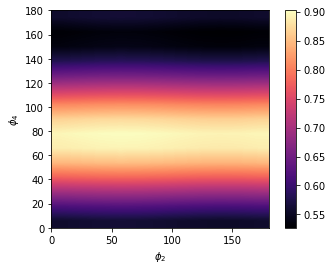

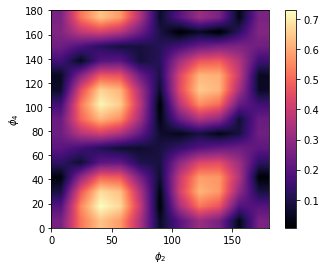

In [19]:
Angles_1, Angles_4 = sp.meshgrid(angles_1_e, angles_4_e)
I_numerica=sp.zeros_like(Angles_1, dtype=float)

for i1, angle_1 in enumerate(angles_1_e):
    for i4, angle_4 in enumerate(angles_4_e):
        I_numerica[i4,i1], M = polarimeter_matrix(P, is_present=is_polarizer, 
                                                 angles=[angle_1,39*degrees,0,angle_4], u0=u0)
dibujar_2d_fitting(angles_1_e, angles_4_e, I_numerica)
dibujar_2d_fitting(angles_1_e, angles_4_e, abs(I_experimental-I_numerica))
print(sp.std(abs(I_experimental-I_numerica)))


##  Ajuste sencillo

Definimos una función que genera la distribución de intensidad, que es la que intentamos optimizar, introducimos los parámetros que ya tenemos conocidos como valores fijos, no se optimizan.

## Definición de funcion de ajuste

In [20]:
[amplitude, angle, phase], u0= get_light_parameters()
print(u0)

[[ 3.2052]
 [-0.0185]
 [ 0.0069]
 [ 3.2051]]


In [21]:
pol_dicts =get_polarimeter_parameters(kind='exp')
pol1,pol2,pol3,pol4 = pol_dicts

pprint.pprint(pol_dicts)

P1_0,P2_0,P3_0,P4_0=polarimeter_matrices(pol_dicts, angles=[0,0,0,0])
pprint.pprint(P1_0)

P1,P2,P3,P4=polarimeter_matrices(pol_dicts, angles=None)
pprint.pprint(P1)


[{'p0': 0.131833739109,
  'p1': 0.962794825004,
  'theta_axis': 0.1168707373720443},
 {'a': 1.0, 'b': 1.0, 'delta': 1.5707963267948966, 'theta_axis': 0},
 {'a': 1.0, 'b': 1.0, 'delta': 1.5707963267948966, 'theta_axis': 0},
 {'p0': 0.131833739109,
  'p1': 0.962794825004,
  'theta_axis': 0.49671770668381915}]
matrix([[0.4722, 0.4548, 0.    , 0.    ],
        [0.4548, 0.4722, 0.    , 0.    ],
        [0.    , 0.    , 0.1269, 0.    ],
        [0.    , 0.    , 0.    , 0.1269]])
matrix([[0.4722, 0.4424, 0.1053, 0.    ],
        [0.4424, 0.4537, 0.0778, 0.    ],
        [0.1053, 0.0778, 0.1455, 0.    ],
        [0.    , 0.    , 0.    , 0.1269]])


In [22]:
def get_intensity_numerical_simple(par_fitting, angles_1, angles_4, u0):
    """
    par_fitting es sobre la lámina retardadora
    par_fitting = ( a, b, delta, angle_3)
    """
    a, b, delta, angle_2_pol = par_fitting
    
    is_polarizer=[True, True, False, True]
    
    #P1=polarizer_linear(p1=pol1['p0'], p2=pol1['p1'], theta=pol1['theta_axis'])
    P2=diattenuating_retarder(p1=a, p2=b, phase=delta, theta=angle_2_pol)
    #P4=polarizer_linear(p1=pol4['p0'], p2=pol4['p1'], theta=pol4['theta_axis'])
         
    Angles_1, Angles_4 = sp.meshgrid(angles_1, angles_4)
    intensity_numerical=sp.zeros_like(Angles_1, dtype=float)

    for i1, angle_1 in enumerate(angles_1):
        P1_r =rotate_mueller(P1, angle_1)
        for i4, angle_4 in enumerate(angles_4):
            P4_r =rotate_mueller(P4, angle_4)
            intensity_numerical[i4,i1]= intensity_numerical[i]=intensity(P4_r*P2*P1_r*u0)
            
    return intensity_numerical

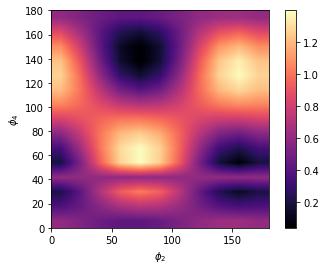

In [23]:
par_example=[1,1,90*degrees,39*degrees]
example=get_intensity_numerical_simple(par_example, angles_1_e, 
                                       angles_4_e, u0)
dibujar_2d_fitting(angles_1_e, angles_4_e, example)

In [24]:
def err_func(par_error, angles_1_e, angles_4_e, u0,I_experimental):
    I_theory=get_intensity_numerical_simple(par_error, angles_1_e, angles_4_e, u0)
    return (abs(I_theory -I_experimental ).flatten())

has_example=True
if has_example:
    par_example=[1,1, 90*degrees, 40*degrees]
    error=err_func(par_example, angles_1_e, angles_4_e, u0,I_experimental)
    print(error.mean())

0.36833498823103555


In [25]:
err_func1 = lambda par, a1,a4, u0, y: abs(get_intensity_numerical_simple(par, a1,a4, u0)
                                         - y)
# Distance to the target function

In [26]:
params_1_ini = np.array([1,1,90*degrees,39*degrees]) # Initial guess for the parameters
params_1_fin, success = optimize.leastsq(err_func, params_1_ini, 
                                         args=(angles_1_e, angles_4_e, u0, I_experimental))

In [27]:
print("a={}, b={}, \ndelta={}, angle={}".format(params_1_fin[0],params_1_fin[1],
                                              params_1_fin[2]/degrees, params_1_fin[3]/degrees))

a=1.01036447807, b=1.00317460273, 
delta=-1.98329513887, angle=4.75828106371


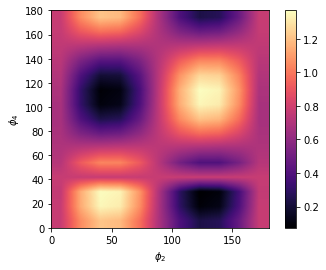

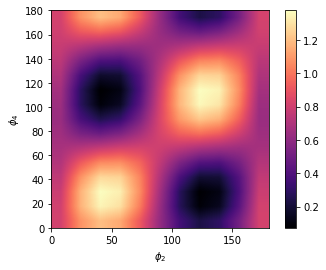

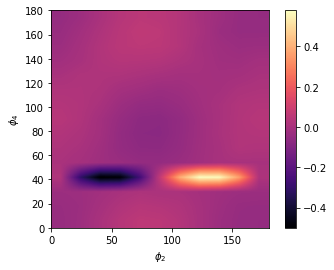

In [28]:
I_best=get_intensity_numerical_simple(params_1_fin, angles_1_e, 
                                       angles_4_e, u0)
dibujar_2d_fitting(angles_1_e, angles_4_e, I_best)
dibujar_2d_fitting(angles_1_e, angles_4_e, I_experimental)
dibujar_2d_fitting(angles_1_e, angles_4_e, I_best-I_experimental)

## Fitting to matrices - 2: completo


In [29]:
def get_intensity_numerical_all(par_fitting, angles_1, angles_4, u0):
    """
    par_fitting son los parámetros de optimización, en este caso
        angle_1, angle_2, angle_4, p1, p0, a, b, delta=par_fitting
    """
    
    angle_1_pol, angle_2_pol, angle_4_pol, p1, p0, a, b, delta=par_fitting
    
    P1=polarizer_linear(p1=p1, p2=p0, theta=angle_1_pol)
    P2=diattenuating_retarder(p1=a, p2=b, phase=delta, theta=angle_2_pol)
    P4=polarizer_linear(p1=p1, p2=p0, theta=angle_4_pol)
    is_polarizer=[True, True, False, True]
    
    #P1=polarizer_linear(p1=pol1['p0'], p2=pol1['p1'], theta=pol1['theta_axis'])
  
    Angles_1, Angles_4 = sp.meshgrid(angles_1, angles_4)
    intensity_numerical=sp.zeros_like(Angles_1, dtype=float)

    for i1, angle_1 in enumerate(angles_1):
        P1_r =rotate_mueller(P1, angle_1)
        for i4, angle_4 in enumerate(angles_4):
            P4_r =rotate_mueller(P4, angle_4)
            intensity_numerical[i4,i1]= intensity_numerical[i]=intensity(P4_r*P2*P1_r*u0)
            
    return intensity_numerical


In [30]:
def err_func2(par_error, angles_1, angles_4, u0,I_experimental):
    I_theory=get_intensity_numerical_all(par_error, angles_1, angles_4, u0)
    return (abs(I_theory -I_experimental).flatten())

has_example=True
if has_example:
    params_2_ini=np.array([6*degrees, 6*degrees, 39*degrees, 1,0, 1, 1, 90*degrees])
    error=err_func2(params_2_ini, angles_1_e, angles_4_e, u0,I_experimental)
    print(error.mean())

0.271623207242697


In [31]:
params_2_ini=np.array([0*degrees, 6*degrees, 120*degrees, 1,0, 1, 1, 90*degrees])

params_2_fin, success = optimize.leastsq(err_func2, params_2_ini,args=(angles_1_e, angles_4_e, u0, I_experimental))


In [32]:
#  angle_1, angle_2, angle_4, p1, p0, a, b, delta=par_fitting

print("p0={}, p1={}".format(params_2_fin[4],params_2_fin[3]))
print("a={}, b={}, delta={}".format(params_2_fin[5],
                                     params_2_fin[6],
                                     params_2_fin[7]/degrees))

print("theta_1={}, theta_2={}, theta_4={}".format(params_2_fin[0]/degrees, 
                                                  params_2_fin[1]/degrees, 
                                                  params_2_fin[2]/degrees))

print(params_2_fin)

p0=-0.00822716337455, p1=0.640479709016
a=2.29573335597, b=2.33698239665, delta=158.262673013
theta_1=-86.8766216201, theta_2=0.022507052474, theta_4=203.195144156
[-1.5163  0.0004  3.5464  0.6405 -0.0082  2.2957  2.337   2.7622]


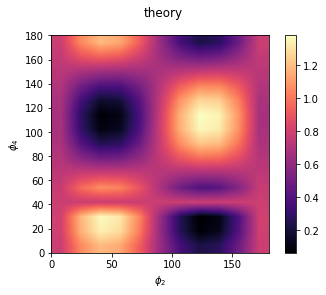

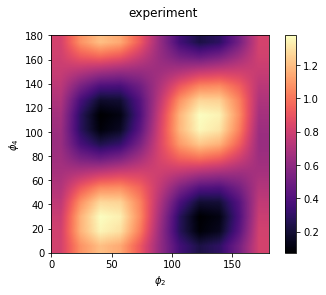

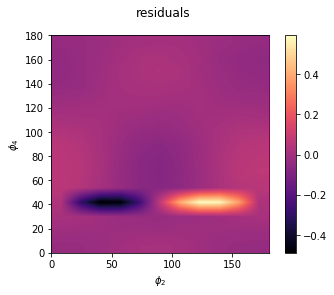

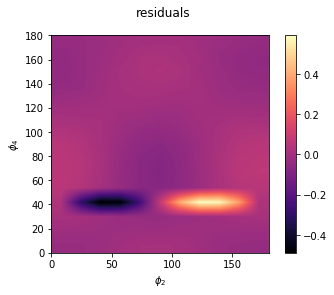

In [33]:
I_best2=get_intensity_numerical_all(params_2_fin, angles_1_e, 
                                       angles_4_e, u0)
dibujar_2d_fitting(angles_1_e, angles_4_e, I_best2, 'theory')
dibujar_2d_fitting(angles_1_e, angles_4_e, I_experimental,'experiment')
dibujar_2d_fitting(angles_1_e, angles_4_e, I_best2-I_experimental, 'residuals')
dibujar_2d_fitting(angles_1_e, angles_4_e, I_best2-I_experimental*I_best2.max()/I_experimental.max(), 'residuals')

## Fitting to matrices - 2: solo angulos


In [34]:
p1,p2,p3,p4=pol_dicts
pprint.pprint(pol_dicts)

[{'p0': 0.131833739109,
  'p1': 0.962794825004,
  'theta_axis': 0.1168707373720443},
 {'a': 1.0, 'b': 1.0, 'delta': 1.5707963267948966, 'theta_axis': 0},
 {'a': 1.0, 'b': 1.0, 'delta': 1.5707963267948966, 'theta_axis': 0},
 {'p0': 0.131833739109,
  'p1': 0.962794825004,
  'theta_axis': 0.49671770668381915}]


In [35]:
def get_intensity_numerical_angulos(par_fitting, angles_1, angles_4, u0):
    """
    par_fitting son los parámetros de optimización, en este caso
        angle_1, angle_2, angle_4, p1, p0, a, b, delta=par_fitting
    """
    
    angle_1_pol, angle_2_pol, angle_4_pol=par_fitting
    
    P1=polarizer_linear(p1=1, p2=0, theta=angle_1_pol)
    P2=diattenuating_retarder(p1=1, p2=1, phase=90*degrees, theta=angle_2_pol)
    P4=polarizer_linear(p1=1, p2=0, theta=angle_4_pol)
    is_polarizer=[True, True, False, True]
    
    #P1=polarizer_linear(p1=pol1['p0'], p2=pol1['p1'], theta=pol1['theta_axis'])
  
    Angles_1, Angles_4 = sp.meshgrid(angles_1, angles_4)
    intensity_numerical=sp.zeros_like(Angles_1, dtype=float)

    for i1, angle_1 in enumerate(angles_1):
        P1_r =rotate_mueller(P1, angle_1)
        for i4, angle_4 in enumerate(angles_4):
            P4_r =rotate_mueller(P4, angle_4)
            intensity_numerical[i4,i1]= intensity_numerical[i]=intensity(P4_r*P2*P1_r*u0)
            
    return intensity_numerical

In [36]:
def err_func3(par_error, angles_1, angles_4, u0,I_experimental):
    I_theory=get_intensity_numerical_angulos(par_error, angles_1, angles_4, u0)
    return (abs(I_theory -I_experimental).flatten())

has_example=True
if has_example:
    params_3_ini=np.array([6*degrees, 6*degrees, 39*degrees])
    error=err_func3(params_3_ini, angles_1_e, angles_4_e, u0,I_experimental)
    print(error.mean())

0.271623207242697


In [37]:
params_3_ini=np.array([0*degrees, 6*degrees, 120*degrees])

params_3_fin, success = optimize.leastsq(err_func3, params_3_ini,args=(angles_1_e, angles_4_e, u0, I_experimental))

print(params_3_fin/degrees)

params_3_fin[2]= params_3_fin[2]-pi
params_3_fin[1]= params_3_fin[1]-pi/2


print(params_3_fin/degrees)


[ 47.0825  44.8435 246.9196]
[ 47.0825 -45.1565  66.9196]


In [38]:

print("theta_1={}, theta_2={}, theta_4={}".format(params_3_fin[0]/degrees, 
                                                  params_3_fin[1]/degrees, 
                                                  params_3_fin[2]/degrees))



theta_1=47.0824601916, theta_2=-45.156479259, theta_4=66.9195829846


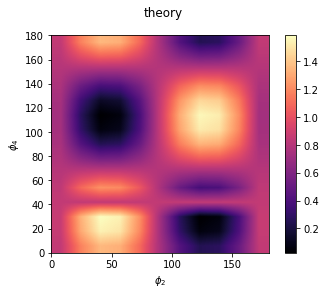

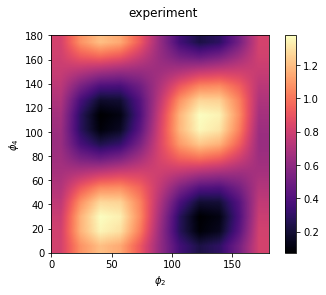

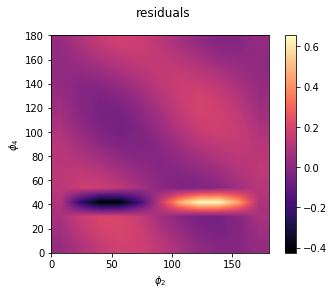

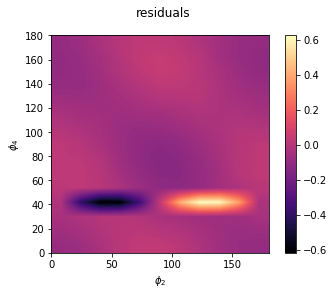

In [39]:
I_best3=get_intensity_numerical_angulos(params_3_fin, angles_1_e, 
                                       angles_4_e, u0)
dibujar_2d_fitting(angles_1_e, angles_4_e, I_best3, 'theory')
dibujar_2d_fitting(angles_1_e, angles_4_e, I_experimental,'experiment')
dibujar_2d_fitting(angles_1_e, angles_4_e, I_best3-I_experimental, 'residuals')
dibujar_2d_fitting(angles_1_e, angles_4_e, I_best3-I_experimental*I_best3.max()/I_experimental.max(), 'residuals')